In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as lp
from scipy import stats
import statsmodels.api as sm
from linearmodels import PanelOLS
from linearmodels import RandomEffects
from linearmodels import BetweenOLS
from matplotlib import pyplot as plt

In [2]:
dt = pd.read_csv("TP1H2021.csv", delimiter=None)
dt_2 = pd.read_csv("3tp.csv", delimiter=None)
df_3 = pd.read_csv("donnes2.csv")
df_t = pd.read_csv("donnes2.csv")

In [3]:
dt.head(5)

,Rm_Rf,rSMB,rHML,rRMW,rCMA,Rs_Rf
0,3.65,0.16,-0.57,2.10,-2.45,5.81
1,-4.94,0.18,1.23,1.75,0.63,-5.01
2,4.24,-0.96,-1.25,1.60,-1.41,4.40
3,2.32,1.44,-0.83,0.87,-0.55,3.46
4,-1.59,1.56,-0.98,-1.81,0.16,-3.65


In [4]:
df = dt.to_numpy()
df_2 = dt_2.to_numpy()

In [5]:
#Création des vecteurs


x = df[0:200,0]
y = df[0:200, df.shape[1] -1]
x = x.reshape(-1, 1)
x2 = sm.add_constant(x)

In [6]:
#Question 1.1


#Avec intercept
model = sm.OLS(y, x2).fit()
print(f"Erreurs au carré: {round(model.mse_total, 4)}, R2: {round(model.rsquared_adj, 4)}, Intercept: {round(model.params[0], 4)}, Coeff: {round(model.params[1], 4)}")
#Sans intercept
m_wo_int = sm.OLS(y, x).fit()
print(f"Erreurs au carré: {round(m_wo_int.mse_total, 4)}, R2: {round(m_wo_int.rsquared_adj, 4)}, Intercept: 0, Coeff: {round(m_wo_int.params[0], 4)}")

Erreurs au carré: 13.6541, R2: 0.664, Intercept: 0.0698, Coeff: 0.7548
Erreurs au carré: 13.878, R2: 0.6708, Intercept: 0, Coeff: 0.7575


In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     394.3
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           5.35e-49
Time:                        09:08:24   Log-Likelihood:                -435.12
No. Observations:                 200   AIC:                             874.2
Df Residuals:                     198   BIC:                             880.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0698      0.153      0.455      0.650      -0.233       0.372
x1             0.7548      0.038     19.857      0.000       0.680       0.830
==============================================================================
Omnibus:                       10.373   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               23.108
Skew:                           0.004   Prob(JB):                     9.60e-06
Kurtosis:                       4.665   Cond. No.                         4.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#écarts-types

market_std = np.std(x)
asset_std = np.std(y)
market_std, asset_std

(3.98429969254322, 3.685901693954954)

In [9]:
#Question 1.3


print(f"W/ int: {round(model.pvalues[0], 4)} > 0.05, on ne peut pas rejeter H0")

W/ int: 0.6496 > 0.05, on ne peut pas rejeter H0


In [10]:
#Question 1.4
print(f"La forme de la régression sera : u ** 2 = \u03b1 + (\u03b1Y ** 2)")

white = sm.stats.diagnostic.het_white(model.resid, x2)
lm = white[0]
print(f"{lm} > {stats.chi2.isf(0.05, 1)}, on peut rejeter H0, nous sommes en présence d'hétéroscédasticité")

La forme de la régression sera : u ** 2 = α + (αY ** 2)
14.131398206695934 > 3.8414588206941285, on peut rejeter H0, nous sommes en présence d'hétéroscédasticité


In [101]:
#Question 1.5 régression linéaire

res_t_1 = sm.add_constant(model.resid[1:]) ** 2
breusch = sm.stats.diagnostic.het_breuschpagan(model.resid[:-1] ** 2, res_t_1)
p_value_lm = breusch[1]
show = sm.OLS(model.resid[:-1] ** 2, res_t_1).fit()
sm.stats.diagnostic.het_arch(model.resid, nlags=1)

(28.82564172408319,
 7.919564961345959e-08,
 33.36960677963687,
 2.9355068180412313e-08)

In [12]:
smb = np.atleast_2d(df[0:200, 1]).T
hml = np.atleast_2d(df[0:200, 2]).T
x_mat = sm.add_constant(np.hstack((x, smb, hml)))

In [13]:
#Question 2.2


triv_model = sm.OLS(y, x_mat).fit()
triv_model.summary(), triv_model.mse_total

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.734
 Model:                            OLS   Adj. R-squared:                  0.730
 Method:                 Least Squares   F-statistic:                     180.2
 Date:                Fri, 23 Apr 2021   Prob (F-statistic):           4.27e-56
 Time:                        09:08:24   Log-Likelihood:                -412.28
 No. Observations:                 200   AIC:                             832.6
 Df Residuals:                     196   BIC:                             845.8
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [14]:
#Test pour hétéroscédasticité
triv_betas = np.array(([triv_model.params[1], triv_model.params[2], triv_model.params[3]]))
triv_res = np.ones(x_mat.shape[0])
for el in np.arange(y.shape[0]):
    triv_res[el] = y[el] - (triv_model.params[0] + triv_betas @ x_mat[el, 1:])
triv_res = triv_res ** 2
#White test
triv_bp = sm.stats.diagnostic.het_breuschpagan(triv_model.resid, x_mat)
triv_bp[0] < stats.chi2.isf(0.05, 3) #on ne peut donc pas rejeter H0

True

In [15]:
rmw = np.atleast_2d(df[0:200, 3]).T
cma = np.atleast_2d(df[0:200, 4]).T
x_quint = np.hstack((x_mat, rmw, cma))
quint_model = sm.OLS(y, x_quint).fit()
quint_model.summary(), quint_model.mse_total

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.827
 Model:                            OLS   Adj. R-squared:                  0.822
 Method:                 Least Squares   F-statistic:                     185.0
 Date:                Fri, 23 Apr 2021   Prob (F-statistic):           8.54e-72
 Time:                        09:08:24   Log-Likelihood:                -369.48
 No. Observations:                 200   AIC:                             751.0
 Df Residuals:                     194   BIC:                             770.7
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [16]:
white_quint = sm.stats.diagnostic.het_white(quint_model.resid, sm.add_constant(x_quint))
white_quint

(17.092830842075244,
 0.6469377845814027,
 0.8363851277173695,
 0.6670916307990982)

In [17]:
#Question 2.6 check for heteroscedasticity in 5 variable model

quint_bp = sm.stats.diagnostic.het_breuschpagan(quint_model.resid ** 2, x_quint)
quint_bp[0] < stats.chi2.isf(0.05, 5) #on ne peut pas rejeter h0
quint_bp, stats.chi2.isf(0.05, 5)

((5.674813710717808,
  0.3391573494846305,
  1.1330634807578477,
  0.3442083286573389),
 11.070497693516355)

In [18]:
dt_2.head(5)

,R,NoComp,Industrie,Actifs,Dette,Ventes,CF,CV
0,0.05314,1,1,485.62,335.34,262.44,94.32,157.20
1,0.05449,2,1,227.24,154.36,381.36,266.70,209.55
2,0.05240,3,1,445.31,449.45,1090.25,261.60,283.40
3,0.05621,4,1,346.97,291.48,142.27,46.86,25.56
4,0.03885,5,1,308.67,231.75,621.09,37.26,298.08


In [19]:
int_y = df_2[0:,0]
d_a = np.atleast_2d(np.divide(df_2[0:,4], df_2[0:,3])).T
d_v = np.atleast_2d(np.divide(df_2[0:,4], df_2[0:,5])).T
cf_v = np.atleast_2d(np.divide(df_2[0:,6], df_2[0:,5])).T
cf_a = np.atleast_2d(np.divide(df_2[0:,6], df_2[0:,3])).T
int_x = sm.add_constant(np.hstack((d_a, d_v, cf_v, cf_a)))

In [20]:
new = quint_model.get_robustcov_results(cov_type='HC1')
new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     182.1
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           2.92e-71
Time:                        09:08:24   Log-Likelihood:                -369.48
No. Observations:                 200   AIC:                             751.0
Df Residuals:                     194   BIC:                             770.7
Df Model:                           5                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4042      0.117     -3.462      0.001      -0.634      -0.174
x1             1.0114      0.038     26.355      0.000       0.936       1.087
x2             0.1592      0.036      4.397      0.000       0.088       0.231
x3             0.0805      0.060      1.344      0.181      -0.038       0.199
x4             0.5318      0.050     10.733      0.000       0.434       0.629
x5             0.1386      0.082      1.686      0.093      -0.024       0.301
==============================================================================
Omnibus:                       12.148   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               29.895
Skew:                           0.075   Prob(JB):                     3.22e-07
Kurtosis:                       4.888   Cond. No.                         5.85
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [22]:
#3.1 OLS

debt_r = sm.OLS(int_y, int_x).fit()
debt_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     9.616
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           9.77e-07
Time:                        09:08:24   Log-Likelihood:                 377.88
No. Observations:                 119   AIC:                            -745.8
Df Residuals:                     114   BIC:                            -731.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0320      0.003     10.785      0.000       0.026       0.038
x1             0.0060      0.004      1.701      0.092      -0.001       0.013
x2             0.0065      0.002      3.275      0.001       0.003       0.010
x3             0.0143      0.008      1.899      0.060      -0.001       0.029
x4             0.0034      0.002      1.418      0.159      -0.001       0.008
==============================================================================
Omnibus:                       25.851   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.344
Skew:                          -0.139   Prob(JB):                     7.76e-47
Kurtosis:                       9.538   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
#3.2 Test 1 : forme generalisee avec white

white_debt = sm.stats.diagnostic.het_white(debt_r.resid, int_x)
white_debt

#Test 2 : test pour heteroscedasticite groupee (clusters)

cluster_debt = sm.stats.diagnostic.het_arch(debt_r.resid, nlags=1)
cluster_debt

(38.95585823495725,
 4.3349746434327063e-10,
 57.169063441631465,
 1.02220692741404e-11)

In [61]:
#3.3

rob_debt = sm.OLS(int_y, int_x).fit()

rob_debt.get_robustcov_results(cov_type='HC0').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     12.30
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           2.38e-08
Time:                        09:25:51   Log-Likelihood:                 377.88
No. Observations:                 119   AIC:                            -745.8
Df Residuals:                     114   BIC:                            -731.9
Df Model:                           4                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0320      0.003     11.057      0.000       0.026       0.038
x1             0.0060      0.003      2.080      0.040       0.000       0.012
x2             0.0065      0.001      5.226      0.000       0.004       0.009
x3             0.0143      0.006      2.204      0.030       0.001       0.027
x4             0.0034      0.002      1.644      0.103      -0.001       0.008
==============================================================================
Omnibus:                       25.851   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.344
Skew:                          -0.139   Prob(JB):                     7.76e-47
Kurtosis:                       9.538   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [71]:
#robuste pour clusters

new_cat = pd.Categorical(df_2[:, 2])
rob_debt.get_robustcov_results(cov_type='cluster', groups=df_2[:, 2]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     125.5
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           6.93e-08
Time:                        09:34:52   Log-Likelihood:                 377.88
No. Observations:                 119   AIC:                            -745.8
Df Residuals:                     114   BIC:                            -731.9
Df Model:                           4                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0320      0.004      8.318      0.000       0.023       0.041
x1             0.0060      0.004      1.464      0.177      -0.003       0.015
x2             0.0065      0.001      7.701      0.000       0.005       0.008
x3             0.0143      0.008      1.792      0.107      -0.004       0.032
x4             0.0034      0.001      3.981      0.003       0.001       0.005
==============================================================================
Omnibus:                       25.851   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.344
Skew:                          -0.139   Prob(JB):                     7.76e-47
Kurtosis:                       9.538   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

In [26]:
dt_3 = df_3.to_numpy()
df_3.head(5)
year = pd.Categorical(df_3.iloc[:,1])
df_3 = df_3.set_index(['Firme', 'Annee'])
df_3['Annee'] = year
cie = pd.Categorical(df_t.iloc[:, 0])
df_t = df_t.set_index(["Firme", 'Annee'])
df_t['Firme'] = cie

In [27]:
#4 B)

pan_x = sm.add_constant(dt_3[:, 3:6])
pan_y = dt_3[:, 2]
std_pool = sm.OLS(pan_y, pan_x).fit()
white_pool = std_pool.get_robustcov_results(cov_type='HC0')
cluster_pool = std_pool.get_robustcov_results(cov_type='cluster', groups=dt_3[:, 0])
#cluster_pool.summary()
cluster_pool.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     13.83
Date:                Fri, 23 Apr 2021   Prob (F-statistic):            0.00157
Time:                        09:08:24   Log-Likelihood:                -167.08
No. Observations:                 108   AIC:                             342.2
Df Residuals:                     104   BIC:                             352.9
Df Model:                           3                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9359      1.015      1.907      0.093      -0.406       4.277
x1             1.0401      0.312      3.331      0.010       0.320       1.760
x2             0.0817      0.109      0.749      0.475      -0.170       0.333
x3             0.2146      0.114      1.875      0.098      -0.049       0.478
==============================================================================
Omnibus:                        0.312   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.222
Skew:                          -0.110   Prob(JB):                        0.895
Kurtosis:                       2.976   Cond. No.                         50.8
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

In [28]:
white_pool.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     4.742
Date:                Fri, 23 Apr 2021   Prob (F-statistic):            0.00385
Time:                        09:08:24   Log-Likelihood:                -167.08
No. Observations:                 108   AIC:                             342.2
Df Residuals:                     104   BIC:                             352.9
Df Model:                           3                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9359      0.709      2.731      0.007       0.530       3.342
x1             1.0401      0.400      2.601      0.011       0.247       1.833
x2             0.0817      0.126      0.649      0.518      -0.168       0.331
x3             0.2146      0.084      2.556      0.012       0.048       0.381
==============================================================================
Omnibus:                        0.312   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.222
Skew:                          -0.110   Prob(JB):                        0.895
Kurtosis:                       2.976   Cond. No.                         50.8
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [29]:
std_pool.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     4.335
Date:                Fri, 23 Apr 2021   Prob (F-statistic):            0.00639
Time:                        09:08:24   Log-Likelihood:                -167.08
No. Observations:                 108   AIC:                             342.2
Df Residuals:                     104   BIC:                             352.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9359      0.728      2.659      0.009       0.492       3.380
x1             1.0401      0.400      2.602      0.011       0.247       1.833
x2             0.0817      0.138      0.592      0.555      -0.192       0.355
x3             0.2146      0.100      2.149      0.034       0.017       0.413
==============================================================================
Omnibus:                        0.312   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.222
Skew:                          -0.110   Prob(JB):                        0.895
Kurtosis:                       2.976   Cond. No.                         50.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#D)

pd_y = df_3.Q
exog_n = ['Gouv', 'R&D', 'Taille']
pd_x = sm.add_constant(df_3[exog_n])
pan = PanelOLS(pd_y, pd_x, entity_effects=True).fit()

In [33]:
print(pan)

                          PanelOLS Estimation Summary                           
Dep. Variable:                      Q   R-squared:                        0.1117
Estimator:                   PanelOLS   R-squared (Between):              0.1063
No. Observations:                 108   R-squared (Within):               0.1117
Date:                Fri, Apr 23 2021   R-squared (Overall):              0.1105
Time:                        09:08:24   Log-likelihood                   -152.95
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.0257
Entities:                           9   P-value                           0.0096
Avg Obs:                       12.000   Distribution:                    F(3,96)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):             4.0257
                            

In [34]:
ran_pan = RandomEffects(pd_y, pd_x).fit()
print(ran_pan)

                        RandomEffects Estimation Summary                        
Dep. Variable:                      Q   R-squared:                        0.1115
Estimator:              RandomEffects   R-squared (Between):              0.1075
No. Observations:                 108   R-squared (Within):               0.1117
Date:                Fri, Apr 23 2021   R-squared (Overall):              0.1107
Time:                        09:08:24   Log-likelihood                   -155.76
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.3504
Entities:                           9   P-value                           0.0063
Avg Obs:                       12.000   Distribution:                   F(3,104)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):             4.3504
                            

In [35]:
ex_t = ['Gouv', 'R&D', 'Taille', 'Firme']
dummy = PanelOLS(pd_y, sm.add_constant(df_t[ex_t])).fit(use_lsdv=True)
dummy.summary

Dep. Variable:,Q,R-squared:,0.3158
Estimator:,PanelOLS,R-squared (Between):,1.0000
No. Observations:,108,R-squared (Within):,0.1117
Date:,"Fri, Apr 23 2021",R-squared (Overall):,0.3158
Time:,09:08:24,Log-likelihood,-152.95
Cov. Estimator:,Unadjusted,,
,,F-statistic:,4.0280
Entities:,9,P-value,0.0001
Avg Obs:,12.000,Distribution:,"F(11,96)"
Min Obs:,12.000,,
Max Obs:,12.000,F-statistic (robust):,4.0280


In [36]:
ex_n = ['Gouv', 'R&D', 'Taille']
no_dum = PanelOLS(pd_y, sm.add_constant(df_t[ex_n]), entity_effects=True, time_effects=True).fit()
no_dum.summary

Dep. Variable:,Q,R-squared:,0.1071
Estimator:,PanelOLS,R-squared (Between):,0.0896
No. Observations:,108,R-squared (Within):,0.1063
Date:,"Fri, Apr 23 2021",R-squared (Overall):,0.1025
Time:,09:08:24,Log-likelihood,-149.61
Cov. Estimator:,Unadjusted,,
,,F-statistic:,3.3968
Entities:,9,P-value,0.0215
Avg Obs:,12.000,Distribution:,"F(3,85)"
Min Obs:,12.000,,
Max Obs:,12.000,F-statistic (robust):,3.3968


In [38]:
#5

five_data = pd.read_csv("q5donnes.csv")

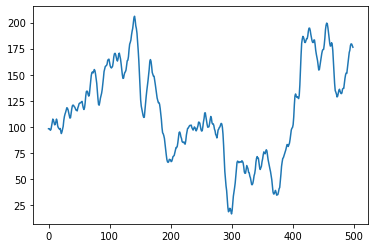

In [39]:
plt.plot(list(range(len(five_data[1:]))), five_data[1:])

In [89]:
orig_dicky = sm.tsa.stattools.adfuller(data_ols, maxlag=20)
orig_dicky

(-1.8072631155074343,
 0.37686176725770265,
 9,
 441,
 {'1%': -3.4452655826028318,
  '5%': -2.868116205869215,
  '10%': -2.570272878944473},
 1852.486662962543)

In [40]:
data_ols = five_data[int(len(five_data) * 0.1):].to_numpy()
dif_d = -np.diff(data_ols, axis=0)
dicky = sm.tsa.stattools.adfuller(dif_d, maxlag=20, autolag=None)
#processus stationnaire
dicky

(-4.825793456546595,
 4.8532411408190246e-05,
 20,
 429,
 {'1%': -3.445685337552546,
  '5%': -2.868300808913956,
  '10%': -2.570371276889389})

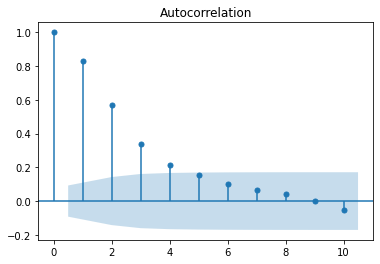

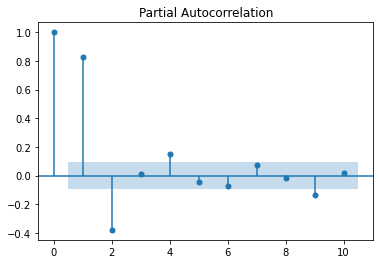

In [41]:
#autocorrelation plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
au_cor = plot_acf(dif_d, lags=10)
pacf = plot_pacf(dif_d, lags=10)

In [42]:
from statsmodels.tsa.arima.model import ARIMA
#Model 1 ARMA 2,2

two_two = ARIMA(dif_d, order=(1, 0, 2)).fit()
two_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  450
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -963.464
Date:                Fri, 23 Apr 2021   AIC                           1936.928
Time:                        09:08:25   BIC                           1957.474
Sample:                             0   HQIC                          1945.026
                                - 450                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1346      0.438     -0.307      0.758      -0.992       0.723
ar.L1          0.5714      0.055     10.345      0.000       0.463       0.680
ma.L1          0.5641      0.064      8.830      0.000       0.439       0.689
ma.L2          0.3635      0.057      6.411      0.000       0.252       0.475
sigma2         4.2234      0.295     14.303      0.000       3.645       4.802
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.97
Prob(Q):                              0.84   Prob(JB):                         0.37
Heteroskedasticity (H):               1.13   Skew:                            -0.14
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
two_three = ARIMA(dif_d, order=(2, 0, 2)).fit()
two_three.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  450
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -963.268
Date:                Fri, 23 Apr 2021   AIC                           1938.535
Time:                        09:08:25   BIC                           1963.191
Sample:                             0   HQIC                          1948.253
                                - 450                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1348      0.427     -0.316      0.752      -0.971       0.701
ar.L1          0.6383      0.167      3.822      0.000       0.311       0.966
ar.L2         -0.0627      0.130     -0.480      0.631      -0.318       0.193
ma.L1          0.5052      0.160      3.161      0.002       0.192       0.818
ma.L2          0.3506      0.072      4.843      0.000       0.209       0.493
sigma2         4.2196      0.295     14.319      0.000       3.642       4.797
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.81
Prob(Q):                              0.94   Prob(JB):                         0.40
Heteroskedasticity (H):               1.12   Skew:                            -0.14
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [99]:
#Diagnostique

#heteroskedasticity exog

h_tt = sm.stats.diagnostic.het_breuschpagan(two_two.resid, dif_d)
h_tth = sm.stats.diagnostic.het_breuschpagan(two_three.resid, dif_d)
a_ot = sm.stats.diagnostic.het_arch(two_two.resid, nlags=1)
a_ot2 = sm.stats.diagnostic.het_arch(two_two.resid, nlags=2)
a_tt = sm.stats.diagnostic.het_arch(two_three.resid, nlags=1)
a_tt2 = sm.stats.diagnostic.het_arch(two_three.resid, nlags=2)
h_tt[-1], h_tth[-1], a_ot[1], a_tt[1], a_ot2[1], a_tt2[1]

(0.10436921724303022,
 0.1205888294987401,
 0.6661595819704594,
 0.7124077113153309,
 0.8757842718676608,
 0.9045368961806383)

In [85]:
#Prev
forecast_d = five_data[:int(len(five_data) * 0.1) + 1].to_numpy()
forecast_d = -np.diff(forecast_d, axis=0)
pred_onetwo = two_two.forecast(50)
pred_twotwo = two_three.forecast(50)
em_onetwo = np.mean((pred_onetwo - forecast_d) ** 2)
em_twotwo = np.mean((pred_twotwo - forecast_d) ** 2)
em_onetwo, em_twotwo

(5.393049670342771, 5.385246433574703)

In [86]:
F_t = em_onetwo / em_twotwo
F_t

1.0014490027270466

In [4]:
stats.f.cdf(0.3723, 108, 93)

4.939413335049655e-07